In [3]:
import pandas as pd
import glob

In [5]:
files = glob.glob("../../data/eval-data/*.csv")
files

['../../data/eval-data/covid-merged.csv',
 '../../data/eval-data/nih-merged.csv',
 '../../data/eval-data/siim-pneumothorax-merged.csv',
 '../../data/eval-data/tbx11k-merged.csv',
 '../../data/eval-data/rsna-pneumonia-merged.csv',
 '../../data/eval-data/mimic-cxr-2.0.0-merged-with-paths.csv',
 '../../data/eval-data/vin-dr-cxr-merged.csv',
 '../../data/eval-data/nih-lt-merged.csv',
 '../../data/eval-data/chexpert_plus_labels_with_5x200.csv',
 '../../data/eval-data/mimic-cxr-lt-merged.csv']

In [71]:
mimic = files[5]
mimic_lt = files[-1]
nih = files[1]
nih_lt = files[-3]
chexpert = files[-2]
vindr = files[-4]
covid = files[0]
siim = files[2]
rsna = files[4]
tbx = files[3]

In [62]:
def calculate_label_counts(df, label_columns):
    """
    Calculate counts for each label in a dataframe with binary label columns.
    
    Args:
        df: pandas DataFrame containing the label columns
        label_columns: list of column names containing binary labels
        
    Returns:
        dict: Mapping of label names to their counts in the dataset
    """
    label_counts = {}
    for col in label_columns:
        # Sum up the 1s in each label column after filling NAs and converting -1s
        df[col] = df[col].fillna(0).replace(-1, 1) 
        label_counts[col] = int(df[col].sum())
    return label_counts

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

def plot_label_distribution(label_counts, title="Label Distribution"):
    """
    Plots a horizontal bar chart of label counts, color-coding each label
    based on what percentage of the total count it represents:
        - Head:   count > 15% of total
        - Medium: 3% < count <= 15% of total
        - Tail:   count <= 3% of total

    Parameters
    ----------
    label_counts : dict
        Dictionary mapping label names to integer counts.
    title : str, optional
        Title of the plot. Default is "Label Distribution".
    """

    # Calculate total and sort labels by count descending
    total_count = sum(label_counts.values())
    items = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
    labels, counts = zip(*items)

    # Define thresholds
    head_threshold = 0.10  # 15%
    medium_threshold = 0.03  # 3%

    # Determine bar colors based on thresholds
    bar_colors = []
    for c in counts:
        ratio = c / total_count
        if ratio > head_threshold:
            bar_colors.append("green")   # Head
        elif ratio > medium_threshold:
            bar_colors.append("orange")  # Medium
        else:
            bar_colors.append("red")     # Tail

    # Create the figure and axis, making it a bit wider
    fig, ax = plt.subplots(figsize=(8, 8))
    y_positions = range(len(labels))

    # Plot horizontal bars
    ax.barh(y_positions, counts, color=bar_colors)
    ax.invert_yaxis()  # Largest count at the top
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)

    # Format x-axis: fewer ticks + comma separators
    ax.xaxis.set_major_locator(ticker.MaxNLocator(6))  # Up to 6 ticks
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

    # Create a legend for color categories
    head_patch = mpatches.Patch(color='green', label='Head (>10%)')
    medium_patch = mpatches.Patch(color='orange', label='Medium (3%-10%)')
    tail_patch = mpatches.Patch(color='red', label='Tail (<=3%)')
    ax.legend(handles=[head_patch, medium_patch, tail_patch], loc='best')

    # Label axes and set title
    ax.set_xlabel("Frequency (Count)")
    ax.set_ylabel("Labels")
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

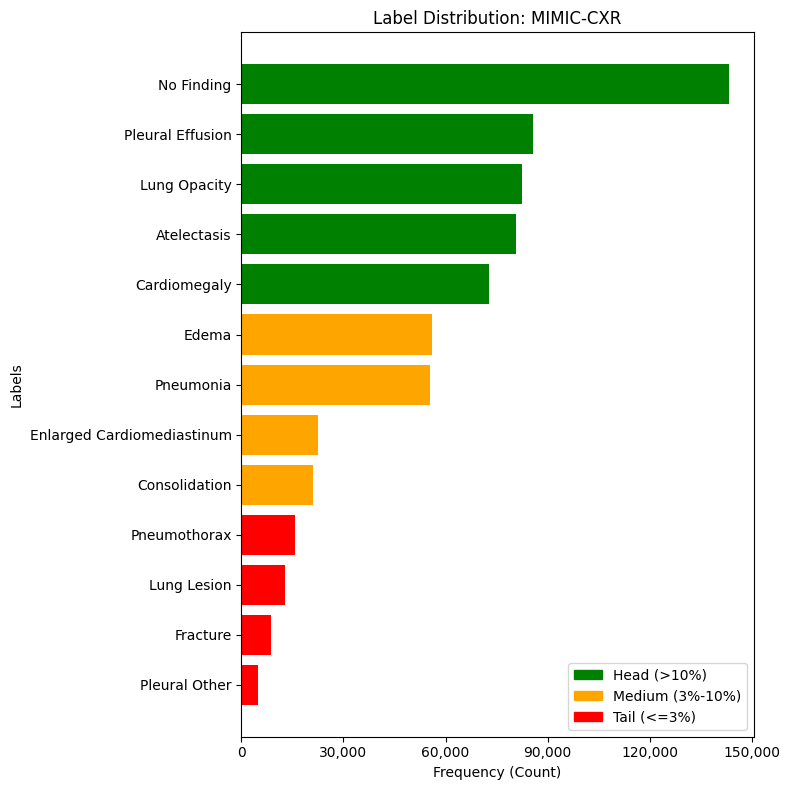

In [63]:
# Define label columns
label_columns = ['Atelectasis',
       'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum',
       'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding',
       'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax']

# Read and process MIMIC data
mimic = pd.read_csv(mimic, sep="\t")
mimic_counts = calculate_label_counts(mimic, label_columns)

plot_label_distribution(mimic_counts,
                        title="Label Distribution: MIMIC-CXR")


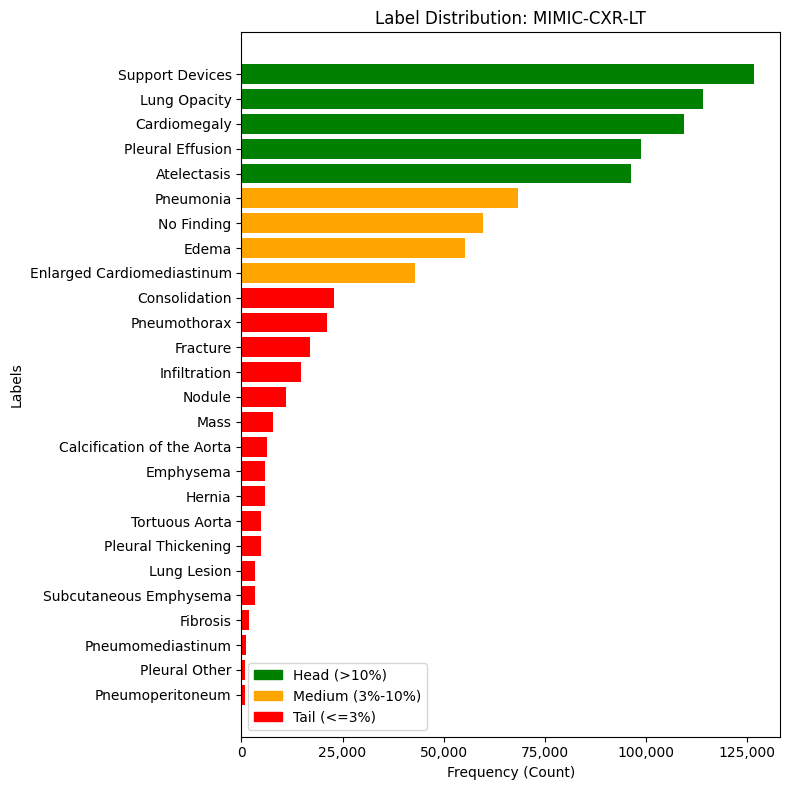

In [64]:
mimic_lt = pd.read_csv(mimic_lt, sep="\t")
label_columns = ['Atelectasis',
       'Calcification of the Aorta', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Emphysema', 'Enlarged Cardiomediastinum', 'Fibrosis', 'Fracture',
       'Hernia', 'Infiltration', 'Lung Lesion', 'Lung Opacity', 'Mass',
       'No Finding', 'Nodule', 'Pleural Effusion', 'Pleural Other',
       'Pleural Thickening', 'Pneumomediastinum', 'Pneumonia',
       'Pneumoperitoneum', 'Pneumothorax', 'Subcutaneous Emphysema',
       'Support Devices', 'Tortuous Aorta']

mimic_lt_counts = calculate_label_counts(mimic_lt, label_columns)

plot_label_distribution(mimic_lt_counts,
                        title="Label Distribution: MIMIC-CXR-LT")

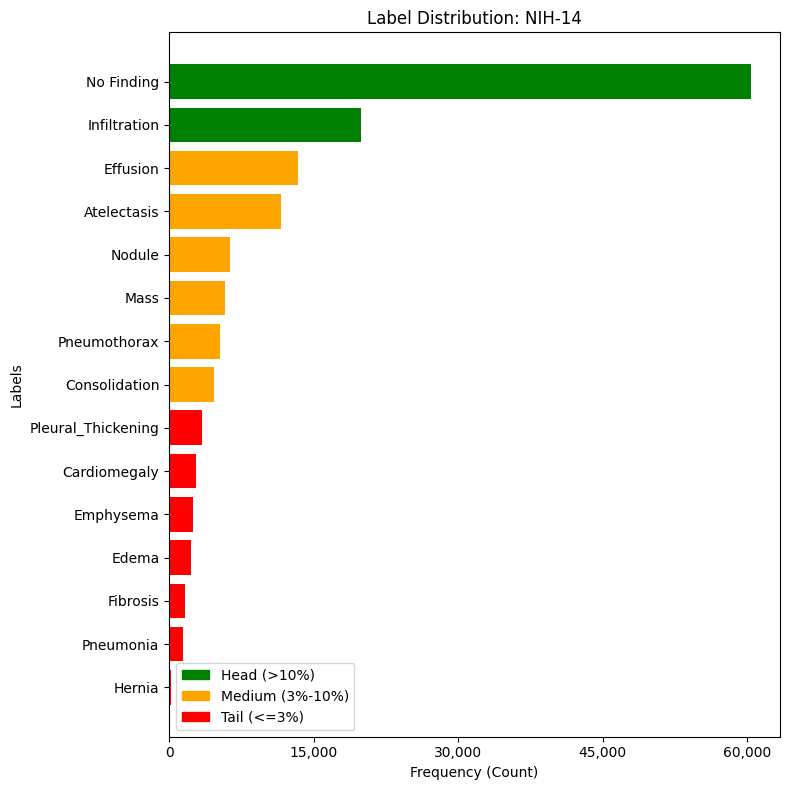

In [65]:
nih = pd.read_csv(nih, sep="\t")
label_columns = ['No Finding', 'Hernia', 'Pleural_Thickening', 'Consolidation',
       'Mass', 'Atelectasis', 'Infiltration', 'Emphysema', 'Pneumonia',
       'Edema', 'Effusion', 'Pneumothorax', 'Nodule', 'Cardiomegaly',
       'Fibrosis']
nih_counts = calculate_label_counts(nih, label_columns)

plot_label_distribution(nih_counts,
                        title="Label Distribution: NIH-14")

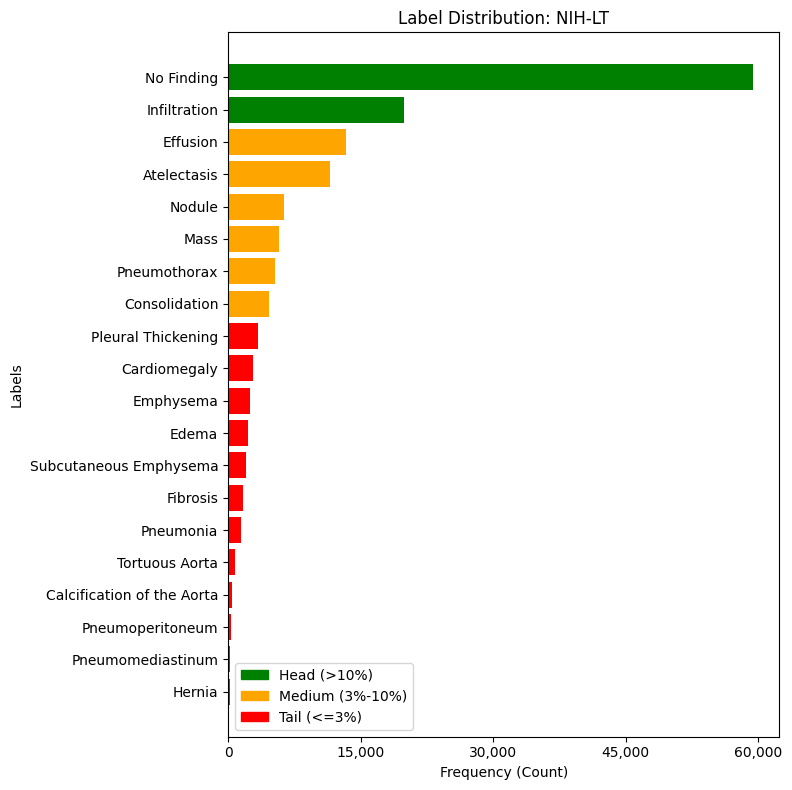

In [66]:
nih_lt = pd.read_csv(nih_lt, sep="\t")
label_columns = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'Pleural Thickening', 'Pneumonia', 'Pneumothorax',
       'Pneumoperitoneum', 'Pneumomediastinum', 'Subcutaneous Emphysema',
       'Tortuous Aorta', 'Calcification of the Aorta', 'No Finding']

nih_lt_counts = calculate_label_counts(nih_lt, label_columns)

plot_label_distribution(nih_lt_counts,
                        title="Label Distribution: NIH-LT")

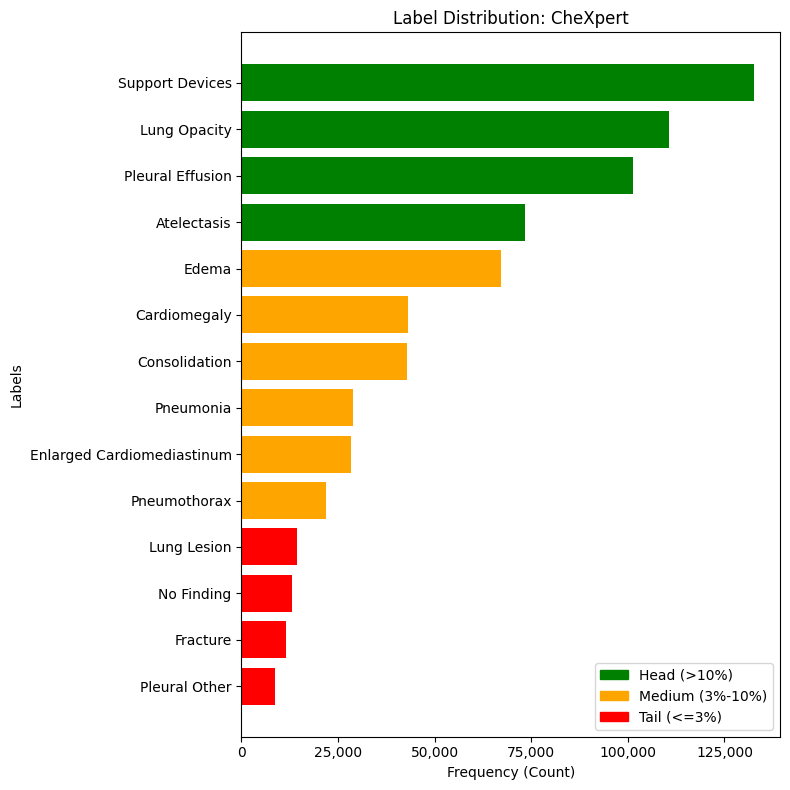

In [67]:
chexpert = pd.read_csv(chexpert, sep="\t")
label_columns = ['Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'No Finding']

chexpert_counts = calculate_label_counts(chexpert, label_columns)

plot_label_distribution(chexpert_counts,
                        title="Label Distribution: CheXpert")

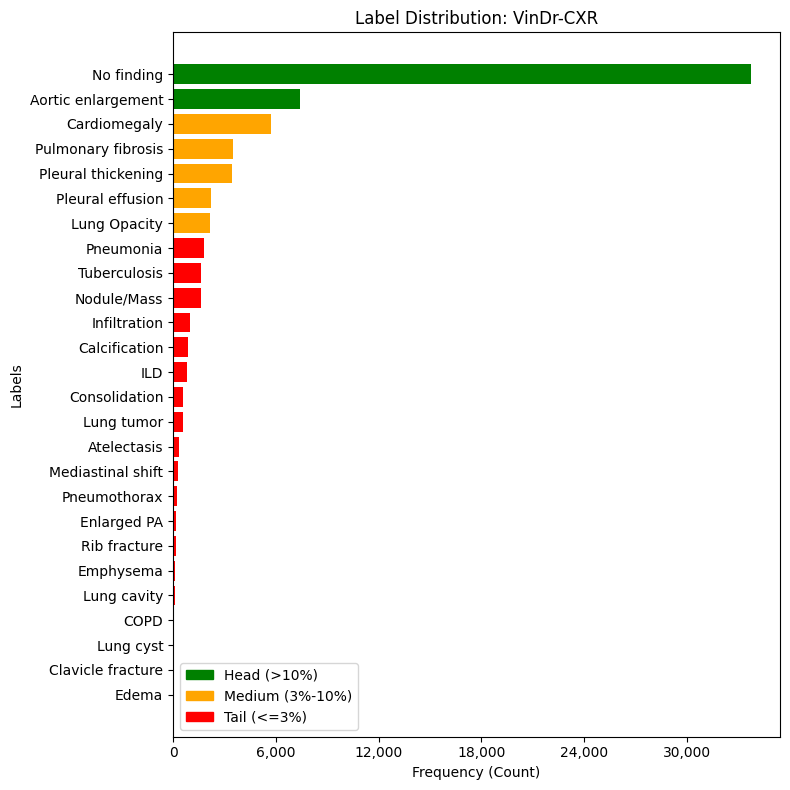

In [68]:
vindr = pd.read_csv(vindr, sep="\t")
label_columns = ['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Clavicle fracture', 'Consolidation', 'Edema',
       'Emphysema', 'Enlarged PA', 'ILD', 'Infiltration', 'Lung Opacity',
       'Lung cavity', 'Lung cyst', 'Mediastinal shift', 'Nodule/Mass',
       'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis', 'Rib fracture', 'COPD', 'Lung tumor', 'Pneumonia',
       'Tuberculosis', 'No finding']

vindr_counts = calculate_label_counts(vindr, label_columns)

plot_label_distribution(vindr_counts,
                        title="Label Distribution: VinDr-CXR")

In [70]:
len(chexpert) + len(mimic) + len(nih) + 7470 + 160868

881017

In [72]:
def load_print_labels(fname):
    df = pd.read_csv(fname, sep="\t")
    print(df.shape)
    print(df.label.value_counts())

In [73]:
load_print_labels(covid)

(84800, 3)
label
1    65681
0    19119
Name: count, dtype: int64


In [74]:
load_print_labels(rsna)

(30227, 3)
label
1    11821
2     9555
0     8851
Name: count, dtype: int64


In [75]:
load_print_labels(siim)

(12954, 3)
label
0    9378
1    3576
Name: count, dtype: int64


In [76]:
load_print_labels(tbx)

(8976, 3)
label
0    4104
1    3800
2    1072
Name: count, dtype: int64
